In [2]:
import math

import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', size=12) 

from altmo.data.decorators import psycopg_context

PG_DSN = 'dbname=schleswig_holstein_osm_2021_06_04 user=thath host=localhost port=5432 password=thath'
STUDY_AREA_ID = 1

In [3]:
def get_df(mode: str) -> pd.DataFrame:
    with psycopg_context(PG_DSN) as cursor:
        cols = (
            'residence_id',
            'all_average_time', 'administrative_average_time', 'community_average_time', 'groceries_average_time',
            'health_average_time', 'nature_average_time', 'outing_destination_average_time', 'school_average_time',
            'shopping_average_time'
        )
        sql = f'''
        SELECT
            {','.join(cols)}
        FROM
            residence_amenity_distance_standardized_categorized s
        JOIN
            residences r
        ON
            s.residence_id = r.id
        WHERE
            mode = %s
        AND
            r.study_area_id = %s
        '''
        cursor.execute(sql, (mode, STUDY_AREA_ID))
        res = cursor.fetchall()

        df = pd.DataFrame(res, columns=cols)
        
        return df.set_index('residence_id')

In [4]:
df_walk = get_df('pedestrian')
df_bike = get_df('bicycle')

In [21]:
## Bike results

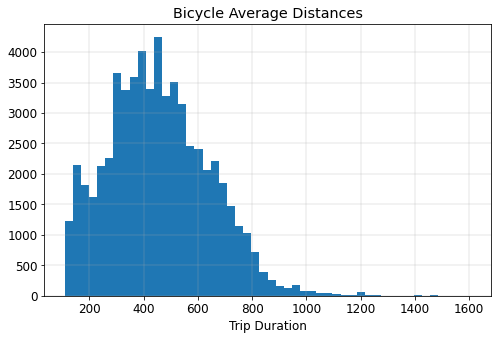

In [82]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(df_bike['all_average_time'], bins=50)
ax.set_xlabel('Trip Duration')
ax.set_title('Bicycle Average Distances')
ax.grid(color="#AAAAAA", linewidth=0.3)

plt.savefig('/home/thath/edu/cau-papers/master-thesis-new/source/figures/all_average_time_bicycle.png')

In [40]:
mean = df_bike['all_average_time'].describe()['mean']
std = df_bike['all_average_time'].describe()['std']
min_ = df_bike['all_average_time'].describe()['min']
max_ = df_bike['all_average_time'].describe()['max']

print(f'Average: {int(mean // 60)} min. {int(mean % 60)} sec.')
print(f'Std. D.: {int(std // 60)} min. {int(std % 60)} sec.')
print(f'Minimum: {int(min_ // 60)} min. {int(min_ % 60)} sec.')
print(f'Maximum: {int(max_ // 60)} min. {int(max_ % 60)} sec.')

Average: 7 min. 37 sec.
Std. D.: 3 min. 6 sec.
Minimum: 1 min. 49 sec.
Maximum: 26 min. 44 sec.


In [22]:
## Walking resultss

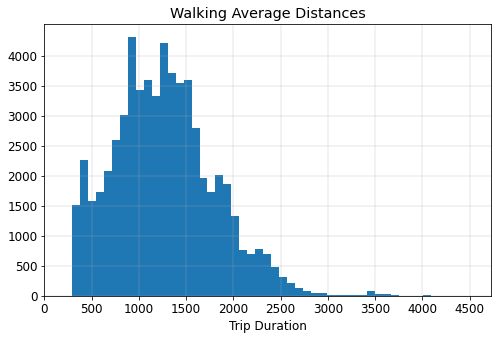

In [83]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(df_walk['all_average_time'], bins=50)
ax.set_xlabel('Trip Duration')
ax.set_title('Walking Average Distances')
ax.grid(color="#AAAAAA", linewidth=0.3)
plt.xticks(list(range(0, 5000, 500)))
plt.yticks(list(range(0, 4500, 500)))

plt.savefig('/home/thath/edu/cau-papers/master-thesis-new/source/figures/all_average_time_pedestrian.png')

In [10]:
mean = df_walk['all_average_time'].describe()['mean']
std = df_walk['all_average_time'].describe()['std']
min_ = df_walk['all_average_time'].describe()['min']
max_ = df_walk['all_average_time'].describe()['max']

print(f'Average: {int(mean // 60)} min. {int(mean % 60)} sec.')
print(f'Std. D.: {int(std // 60)} min. {int(std % 60)} sec.')
print(f'Minimum: {int(min_ // 60)} min. {int(min_ % 60)} sec.')
print(f'Maximum: {int(max_ // 60)} min. {int(max_ % 60)} sec.')

Average: 20 min. 31 sec.
Std. D.: 8 min. 37 sec.
Minimum: 4 min. 50 sec.
Maximum: 73 min. 10 sec.


In [11]:
df_walk['all_average_time'].describe()

count    60606.000000
mean      1231.315225
std        517.826026
min        290.859168
25%        855.071832
50%       1216.851792
75%       1539.253630
max       4390.292408
Name: all_average_time, dtype: float64

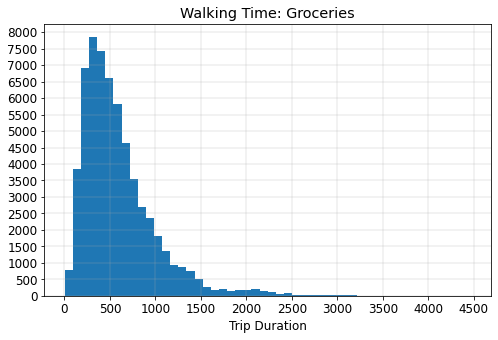

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(df_walk['groceries_average_time'], bins=50)
ax.set_xlabel('Trip Duration')
ax.set_title('Walking Time: Groceries')
ax.grid(color="#AAAAAA", linewidth=0.3)
plt.xticks(list(range(0, 5000, 500)))
plt.yticks(list(range(0, 8500, 500)))

plt.savefig('/home/thath/edu/cau-papers/master-thesis-new/source/figures/groceries_average_time_pedestrian.png')